In [18]:
from nixtla import NixtlaClient
import pandas as pd

In [19]:
nixtla_client = NixtlaClient(
    api_key = 'nixtla-tok-WgE8MEuLXfee5pzkScwGhD0FkGhMcM2TF9HlmyBdsYqkRdznaQHgMyd1t4PIWfo8TLhZkF9NRKm65GKL'
)
nixtla_client.validate_api_key()

INFO:nixtla.nixtla_client:Happy Forecasting! :), If you have questions or need support, please email ops@nixtla.io


True

In [20]:
df = pd.read_csv('./data/5_2022_1_2022_12.csv')
df = df[(df['iu_ac'] == 5) & (df['t_1h'] >= '2022-01-01') & (df['t_1h'] <= '2022-11-30')]
df.head()

,iu_ac,t_1h,etat_barre,q
0,5,2022-01-01 00:00:00,3,1068.0
1,5,2022-01-01 01:00:00,3,1462.0
2,5,2022-01-01 02:00:00,3,1467.0
3,5,2022-01-01 03:00:00,3,1505.0
4,5,2022-01-01 04:00:00,3,1359.0


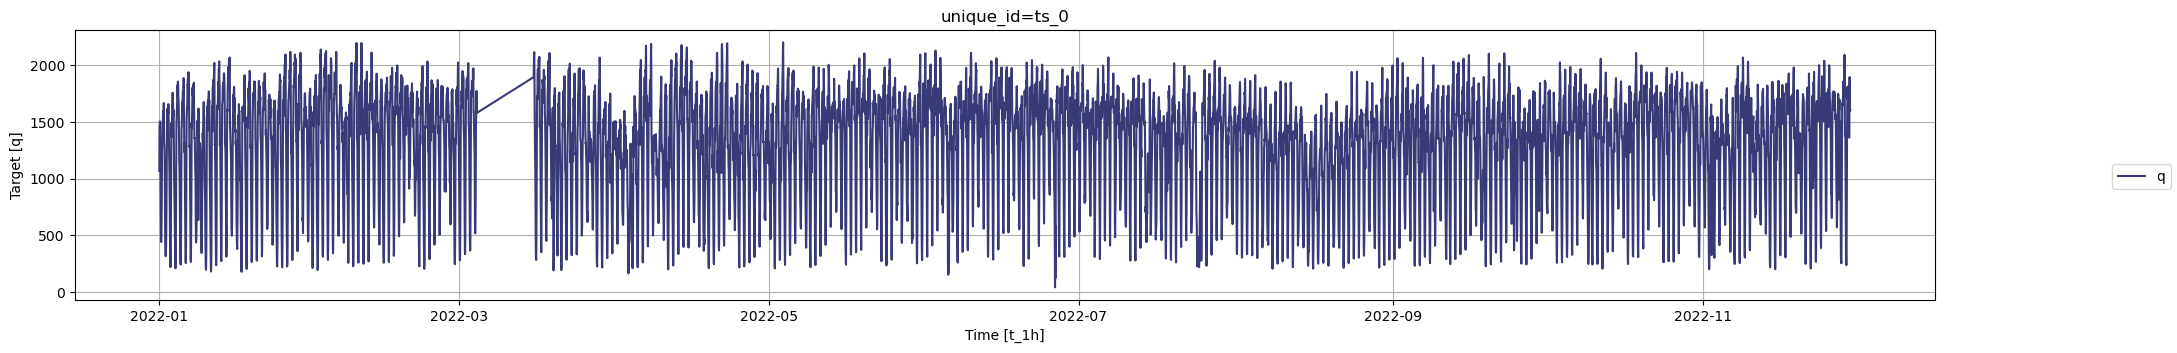

In [21]:
nixtla_client.plot(df, time_col='t_1h', target_col='q')

In [22]:
timegpt_fcst_df = nixtla_client.forecast(df=df, h=31*24, freq='H', time_col='t_1h', target_col='q', model='timegpt-1')
timegpt_fcst_df.head()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
/media/ssd4t/anaconda3/envs/traffic/lib/python3.9/site-packages/utilsforecast/preprocessing.py:126: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset = pd.tseries.frequencies.to_offset(freq)
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


,t_1h,TimeGPT
0,2022-11-30 00:00:00,1488.224976
1,2022-11-30 01:00:00,1209.420410
2,2022-11-30 02:00:00,974.132812
3,2022-11-30 03:00:00,726.835693
4,2022-11-30 04:00:00,536.273560


In [23]:
timegpt_fcst_df = timegpt_fcst_df.rename(columns={'TimeGPT': 'q'})

In [24]:
timegpt_fcst_df.shape

(744, 2)

In [25]:
eval_df = pd.read_csv('./data/5_2022_1_2022_12.csv')
eval_df.shape

(7752, 4)

In [26]:
from sklearn.metrics import mean_absolute_error
# 将 t_1h 列转换为日期时间格式
timegpt_fcst_df['t_1h'] = pd.to_datetime(timegpt_fcst_df['t_1h'])
eval_df['t_1h'] = pd.to_datetime(eval_df['t_1h'])

# 合并两个数据框，确保在 t_1h 列上对齐
merged_df = pd.merge(timegpt_fcst_df, eval_df, on='t_1h', suffixes=('_timegpt', '_eval'))

# 计算 q 值之间的绝对误差
absolute_errors = abs(merged_df['q_timegpt'] - merged_df['q_eval'])

# 计算 MAE
mae = mean_absolute_error(merged_df['q_eval'], merged_df['q_timegpt'])

print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 132.61895252574573


In [27]:
merged_df.head()

,t_1h,q_timegpt,iu_ac,etat_barre,q_eval
0,2022-11-30 00:00:00,1488.224976,5,3,1591.0
1,2022-11-30 01:00:00,1209.420410,5,3,1392.0
2,2022-11-30 02:00:00,974.132812,5,3,889.0
3,2022-11-30 03:00:00,726.835693,5,3,562.0
4,2022-11-30 04:00:00,536.273560,5,3,339.0
